<a href="https://colab.research.google.com/github/chesterhuynguyen/huynguyen_INFO5731_Fall2023/blob/main/Huy_Nguyen_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [33]:
pip install pandas scikit-learn gensim bertopic

Another way: Using TfidfVector, kMeans and TruncatedSVD

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Assuming 'Cleaned_Review' is the column containing the cleaned reviews
documents = df['Cleaned_Review']

# Use TfidfVectorizer for text representation
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply KMeans clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pipeline = make_pipeline(vectorizer, kmeans)
pipeline.fit(documents)

# Get cluster centers and features
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Summarize and describe the topic for each cluster
for i in range(num_clusters):
    cluster_features = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"\nCluster #{i + 1}:")
    print(f"Features: {', '.join(cluster_features)}")

    # Get top reviews for the cluster
    cluster_indices = pipeline.named_steps['kmeans'].labels_ == i
    cluster_reviews = df.loc[cluster_indices, 'Review'][:5]  # Display top 5 reviews
    print("Top Reviews:")
    for idx, review in enumerate(cluster_reviews):
        print(f"{idx + 1}. {review}")

# Additional: Use TruncatedSVD for dimensionality reduction and better topic interpretation
num_topics = 5
svd = TruncatedSVD(n_components=num_topics)
X_svd = svd.fit_transform(X)

# Display topics for each cluster using TruncatedSVD
for i in range(num_clusters):
    print(f"\nCluster #{i + 1} Topics (using TruncatedSVD):")
    cluster_indices = pipeline.named_steps['kmeans'].labels_ == i
    cluster_svd = X_svd[cluster_indices]
    top_topics = cluster_svd.mean(axis=0).argsort()[::-1][:5]
    top_topics_terms = [terms[ind] for ind in top_topics]
    print(f"Top Topics: {', '.join(top_topics_terms)}")



Cluster #1:
Features: like, movie, character, riri, pretty, black, thought, understand, action, marvel
Top Reviews:
1. I am conflicted with this film and with Marvel.Let's review the good first. There is a heartfelt tribute to T'Challa and obviously to the actor who played him. The emotions shown feel real and manage to move. The performances are good in this regard. Angela Bassett stands out above the rest.I'm not one to oppose the replacement of Atlantis by Talokan, as this gives another excellent excuse to show some content that derives from universal culture in gigantic products like the MCU movies. Namor is an excellent addition to the ranks of Marvel superheroes immediately showing how powerful he is and what he is capable of.The action sequences are entertaining, as Marvel has already accustomed us.The wardrobe is also something to value in this film. There is a great effort and meaning behind each of the suits, which successfully try to mix the different cultures with the new 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here





I used CountVectorizer because it is a versatile and widely-used tool for feature extraction in text classification. Its simplicity, compatibility with scikit-learn, and effectiveness in capturing the frequency of words make it a popular choice for building text-based machine learning models.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Reviews.csv')
X = df['Cleaned_Review']
y = df['Sentiment']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build sentiment classifiers with two algorithms: Multinomial Naive Bayes and Random Forest
# Classifier 1: Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_scores = cross_val_score(nb_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy')
nb_classifier.fit(X_train_vectorized, y_train)

# Classifier 2: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy')
rf_classifier.fit(X_train_vectorized, y_train)

# Evaluate and compare performance
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate Multinomial Naive Bayes classifier
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_classifier(nb_classifier, X_test_vectorized, y_test)

# Evaluate Random Forest classifier
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_classifier(rf_classifier, X_test_vectorized, y_test)

# Print results
print("Multinomial Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}\n")

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")


Multinomial Naive Bayes Classifier:
Accuracy: 0.6000
Precision: 0.6000
Recall: 0.6000
F1 Score: 0.5867

Random Forest Classifier:
Accuracy: 0.6500
Precision: 0.7193
Recall: 0.6500
F1 Score: 0.5991


In [43]:
# (1) Multinomial Naive Bayes with 10-fold cross-validation
nb_classifier = MultinomialNB()
nb_cv_scores = cross_val_score(nb_classifier, X_train_vectorized, y_train, cv=10, scoring='accuracy')
nb_mean_cv_accuracy = nb_cv_scores.mean()

# (2) Random Forest with 10-fold cross-validation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train_vectorized, y_train, cv=10, scoring='accuracy')
rf_mean_cv_accuracy = rf_cv_scores.mean()

# Print the cross-validation results
print("Multinomial Naive Bayes Cross-Validation Accuracy: {:.4f}".format(nb_mean_cv_accuracy))
print("Random Forest Cross-Validation Accuracy: {:.4f}".format(rf_mean_cv_accuracy))

Multinomial Naive Bayes Cross-Validation Accuracy: 0.2268
Random Forest Cross-Validation Accuracy: 0.2643


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


Data Preprocessing

In [19]:
# Import and prepare data
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#Separarte numerical and categorical data

train_categorical_data = [var for var in train_data.columns if train_data[var].dtype=='O']
train_numerical_data = [var for var in train_data.columns if train_data[var].dtype=='float']
test_categorical_data = [var for var in test_data.columns if test_data[var].dtype=='O']
test_numerical_data = [var for var in test_data.columns if test_data[var].dtype=='float']

#Imputing the missing values for all the numerical attributes.

for i in train_numerical_data:
    train_data[i].fillna(value = train_data[i].mean(),inplace = True)
for i in test_numerical_data:
    test_data[i].fillna(value = test_data[i].mean(),inplace = True)

train_data.isnull().sum()
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

Visualize Data

In [20]:
pip install matplotlib

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>,
        <Axes: xlabel='FullBath', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='

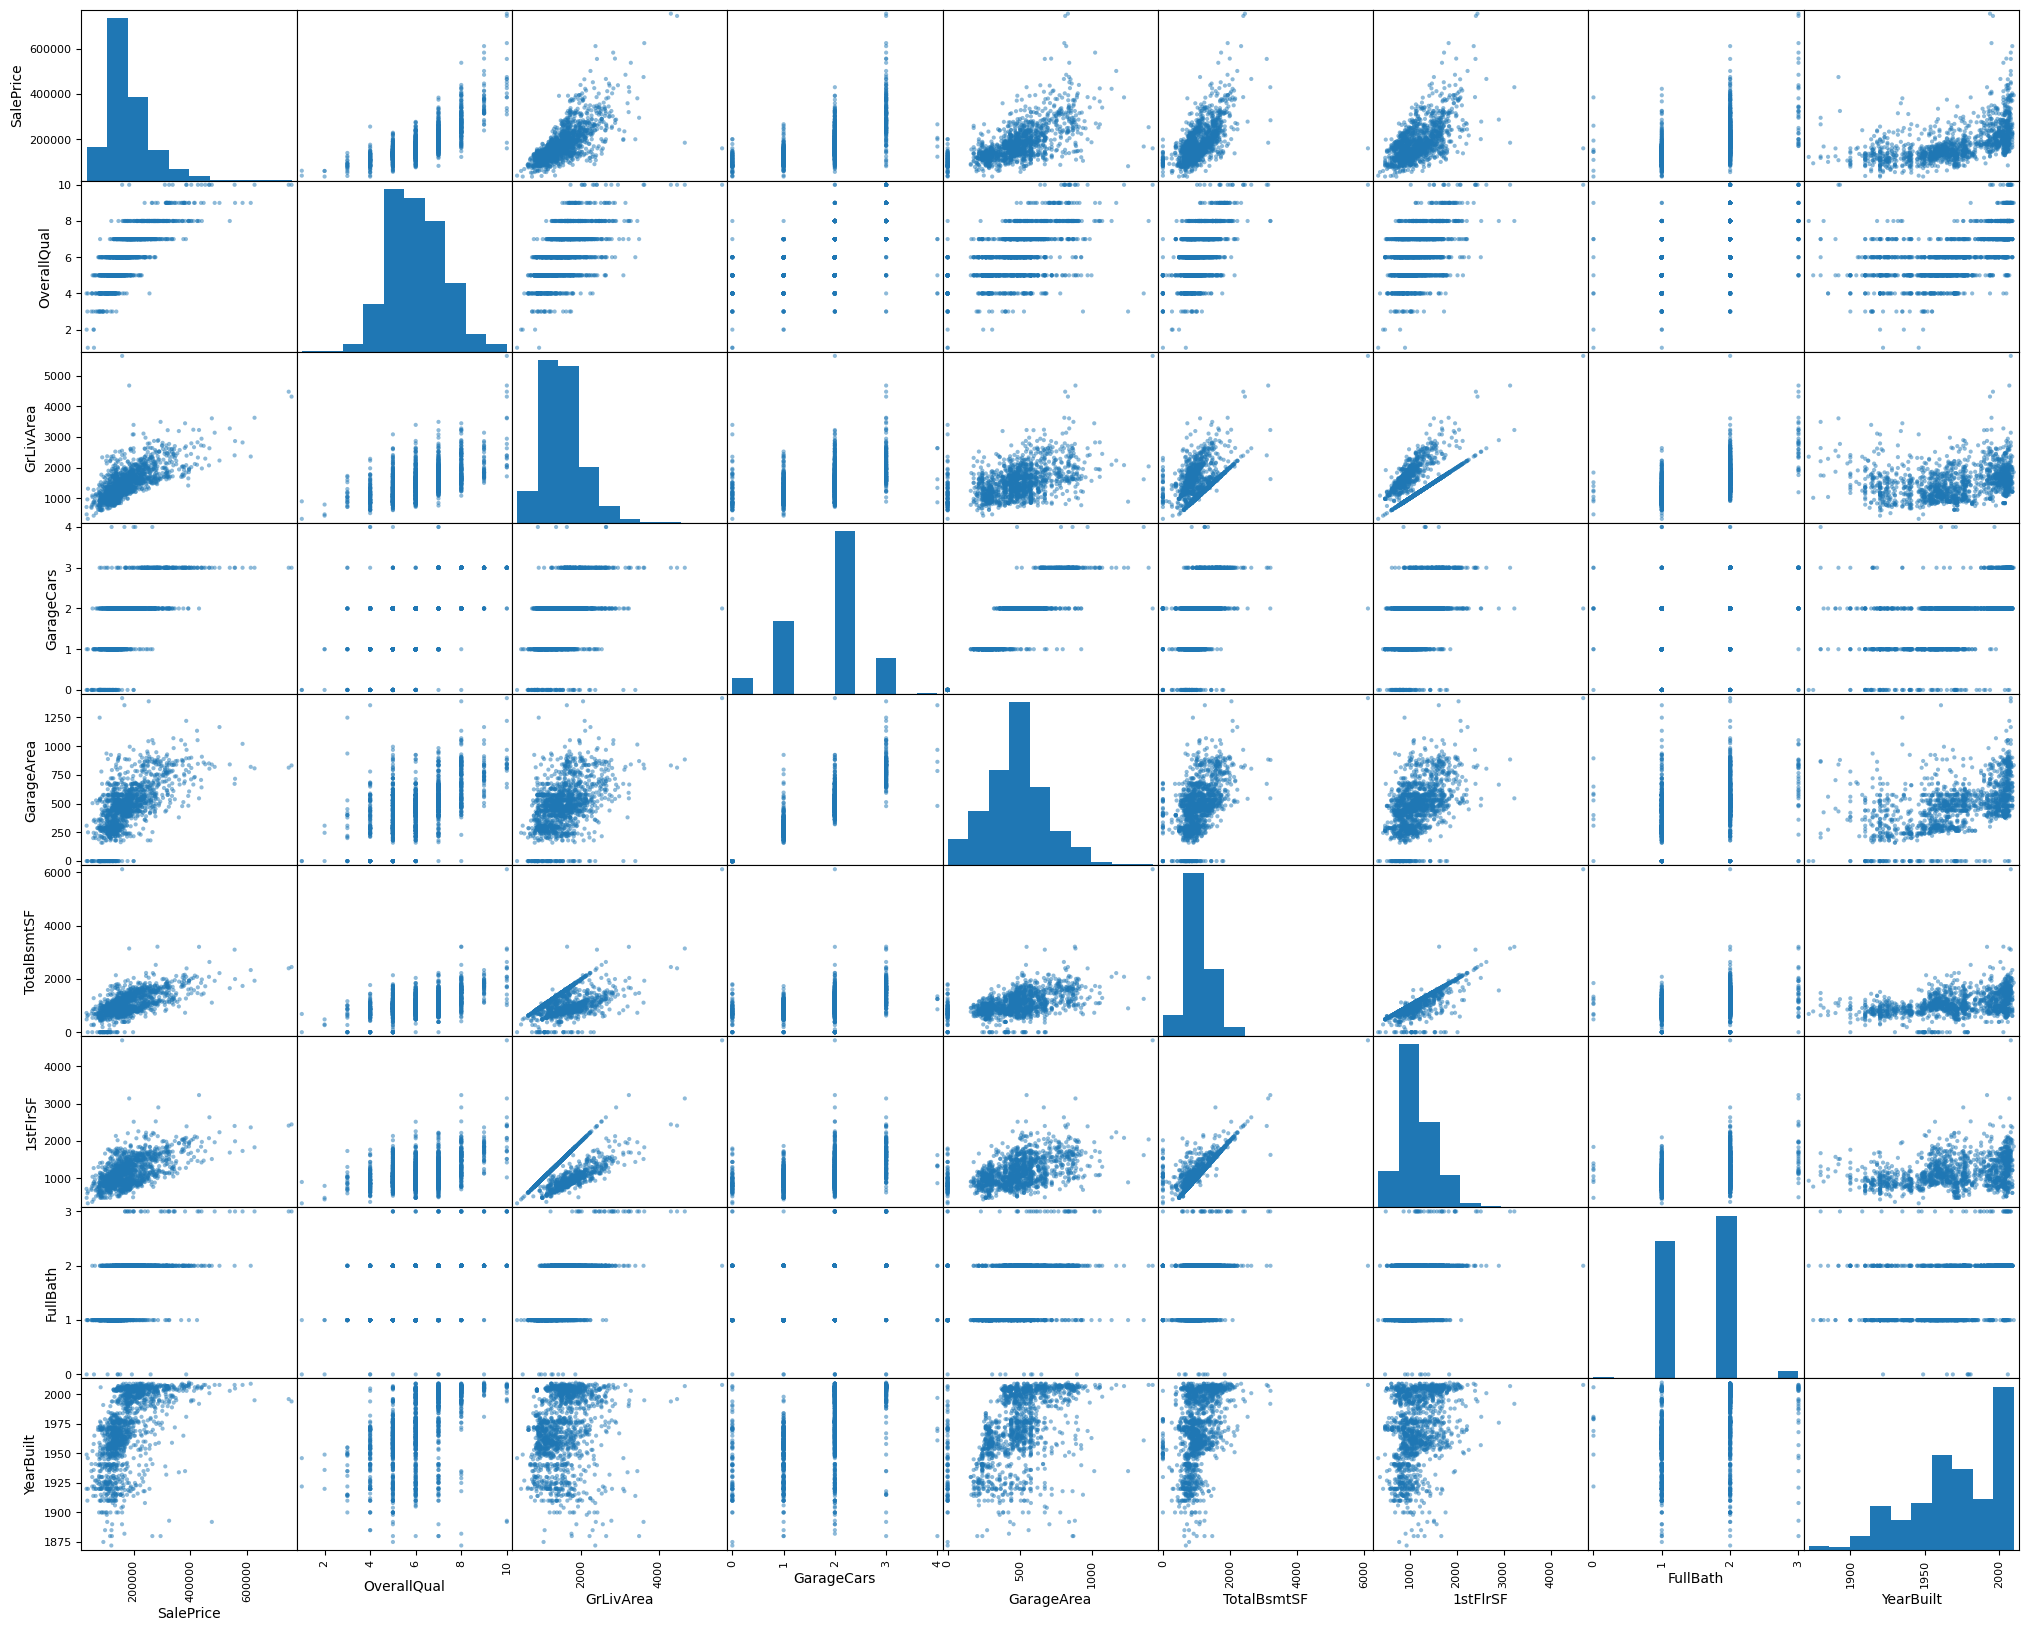

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea","TotalBsmtSF","1stFlrSF", "FullBath","YearBuilt" ]
scatter_matrix(train_data[attributes], figsize=(25, 20))

Dropped unwanted collumns

In [22]:
import numpy as np
import pandas as pd

# Select only numerical columns for correlation matrix
numerical_train_data = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
cor_matrix = numerical_train_data.corr().abs()

# Create the upper triangle matrix to identify correlated pairs
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Find the columns which have a correlation greater than 0.80
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

# Drop ID and attributes from training and test set
train_data.drop(columns = to_drop, axis = 1, inplace = True)
test_data.drop(columns = to_drop, axis = 1, inplace = True)
train_data.drop(labels = ['Id'], axis = 1, inplace = True)
test_data.drop(labels = ['Id'], axis = 1, inplace = True)

#Label encoding data in training and testing sets
from sklearn.preprocessing import LabelEncoder

for column in train_data.columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[column].values))
    train_data[column] = encoder.transform(list(train_data[column].values))

for column in test_data.columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[column].values))
    test_data[column] = encoder_test.transform(list(test_data[column].values))

# Print columns to be dropped
print("The collumns that need to be dropped are:\n", to_drop)

The collumns that need to be dropped are:
 ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


Linear Regression

In [26]:
#Partition Data
x_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
x_test = test_data.iloc[:,:]

# Calculate R-square Value
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
print("R-Square value: ", lr.score(x_train,y_train)) #print value

# Split the dataset for model validation
from sklearn.model_selection import train_test_split
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Model Validation using Cross-Validation
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores = cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
lr_rmse_scores = np.sqrt(-scores)
print("Scores:", lr_rmse_scores)
print("Mean:", lr_rmse_scores.mean())
print("Standard deviation:", lr_rmse_scores.std())

# Train the model
lr.fit(x_train, y_train)

# Evaluate on the validation set
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Prepare the test set
x_test = scaler.transform(test_data)

# Predict on test set
predictions_lr = lr.predict(x_test)
pd.DataFrame({'Predicted House Price': predictions_lr})

R-Square value:  0.9174185321709603
Scores: [47.43171143 41.04951395 52.25030686 70.07412099 69.0476899  48.53088807
 52.25064487 50.4473315  63.52403047 40.30274957]
Mean: 53.490898759956885
Standard deviation: 10.099763037013508
RMSE: 51.70988430285448


,Predicted House Price
0,72.738464
1,213.303487
2,310.248488
3,341.324747
4,294.754270
...,...
1454,-14.079409
1455,-41.955964
1456,248.126772
1457,88.236074


from matplotlib import pyplot as plt
_df_30['Predicted House Price'].plot(kind='hist', bins=20, title='Predicted House Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Predicted House Price'].plot(kind='line', figsize=(8, 4), title='Predicted House Price')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Write your code here


